<a href="https://colab.research.google.com/github/AydenRU/neural_networks-/blob/main/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D1%81%D0%B5%D1%82%D0%B8_%D0%9F_%D0%A0_%E2%84%963.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


**В качестве интерфейса для работы с моделями используйте [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [ ]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from keras.models import Sequential

from tensorflow import keras

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

## 1.2. Разделяем данные на обучающую и тестовую выборку

In [ ]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

trainX = np.expand_dims(trainX, axis=3) / 255.0
testX = np.expand_dims(testX, axis=3) / 255.0

trainy = keras.utils.to_categorical(trainy, 10)
testy = keras.utils.to_categorical(testy, 10)


print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

Train: X =  (60000, 28, 28, 1)
Test: X =  (10000, 28, 28, 1)


In [ ]:
trainX[0][:,:,0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

## 1.3. Визуализируем часть данных из датасета

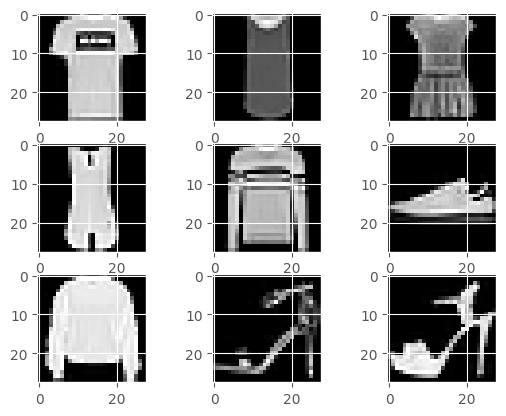

In [ ]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [ ]:
model = Sequential([
    Conv2D(128, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 64)        73792     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 3136)              0         
                                                                 
 dense_20 (Dense)            (None, 128)             

In [ ]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

## 1.5. Обучаем модель

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0)

In [ ]:
EPOCH = 2

his = model.fit(trainX, trainy, batch_size=32, epochs=EPOCH, validation_split=0.2, callbacks=[checkpoint])

model.evaluate(testX, testy)

Epoch 1/2
1500/1500 [==============================] - 236s 156ms/step - loss: 0.4132 - accuracy: 0.8511 - val_loss: 0.3120 - val_accuracy: 0.8878
Epoch 2/2
   1/1500 [..............................] - ETA: 3:00 - loss: 0.2900 - accuracy: 0.9375

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 12s 39ms/step - loss: 0.2684 - accuracy: 0.9000


[0.26836472749710083, 0.8999999761581421]

In [ ]:
from keras.models import load_model

model = load_model("/content/best_model.h5")

## 1.6. Анализируем обученную модель. Строим график (графики) обучения

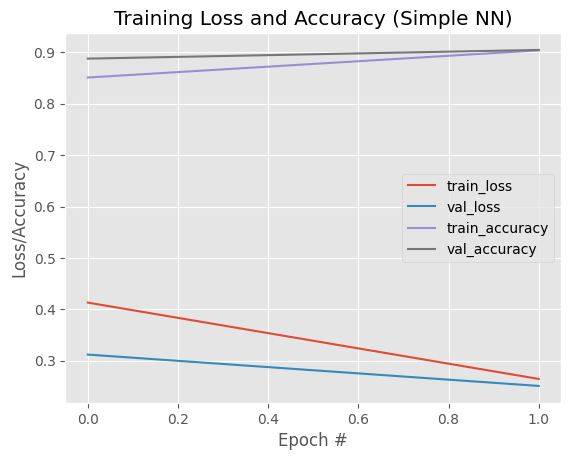

In [ ]:
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, his.history["loss"], label="train_loss")
plt.plot(N, his.history["val_loss"], label="val_loss")
plt.plot(N, his.history["accuracy"], label="train_accuracy")
plt.plot(N, his.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [ ]:
!pip install gradio

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# Ваш код
def preprocess_image(img, compression_size = 32):

    """
    Функция для изменения размера, "выравнивания" и масштабирования изображения.

    Args:
    img: Изображение.

    Returns:
    Предобработанное изображение.
    """

    image = img.copy()  # Создаем копию изображения
    # Изменяем размер изображения до compression_size x compression_size пикселей
    image = cv2.resize(image, (compression_size, compression_size))
    # Преобразуем изображение в одномерный массив (вектор)
    image = image.flatten()
    # Масштабируем значения пикселей к диапазону [0, 1]
    image = image.astype("float") / 255.0
    # Преобразуем массив в формат, совместимый с нашей моделью Keras
    image = image.reshape((1, image.shape[0]))

    return image

In [ ]:
def predict_image(img, model_path = "best_model.h5"):

    # Загружаем модель и метки
    model = load_model(model_path)  # Загрузка модели Keras

    # Делаем предсказание на изображении
    img = cv2.resize(img, (28, 28)) # Изменение разрешения изображения
    cv2_imshow(img)
    img = np.invert(img)
    cv2_imshow(img)
    img = img / 255.0
    img = img.reshape(-1, 28, 28, 1) # Приводим изображение из вида (28,28) в вид (1, 28, 28, 1)
    preds = model.predict(img)
    print(testX[0:1].shape)
    print(img.shape)  # Выполнение предсказания
    print(model.predict(testX[0:1]))
    print(preds)
    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {class_names[i]: preds[0][i] for i in range(10)}

    return confidences

In [ ]:
import gradio as gr

In [ ]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

interface = gr.Interface(
    fn=predict_image,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение", image_mode="L"),  # Входные данные: изображение
    outputs= gr.Label(num_top_classes=len(class_names)), # Выходные данные: топ-N классов с наибольшей вероятностью
)
interface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://2b3849e93f72086283.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 86ms/step
(1, 28, 28, 1)
(1, 28, 28, 1)
1/1 [==============================] - 0s 26ms/step
[[1.4846820e-05 7.5734165e-06 3.2614944e-06 1.1416017e-06 2.5152979e-06
  1.1324478e-02 6.3071125e-06 6.6604638e-03 1.7946228e-05 9.8196143e-01]]
[[8.9031419e-06 3.0246643e-08 8.8325720e-07 1.2037739e-07 7.6902495e-08
  7.0831855e-03 2.4163171e-07 9.9036521e-01 1.1197366e-06 2.5402899e-03]]


1/1 [==============================] - 0s 91ms/step
(1, 28, 28, 1)
(1, 28, 28, 1)
1/1 [==============================] - 0s 24ms/step
[[1.4846820e-05 7.5734165e-06 3.2614944e-06 1.1416017e-06 2.5152979e-06
  1.1324478e-02 6.3071125e-06 6.6604638e-03 1.7946228e-05 9.8196143e-01]]
[[3.7838027e-01 1.8973615e-04 7.0223948e-03 3.0434167e-03 3.2930445e-02
  5.4328551e-04 4.8383620e-01 3.9193590e-04 9.3629323e-02 3.2991014e-05]]
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://2b3849e93f72086283.gradio.live


# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [ ]:
# Ваш код

## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

In [ ]:
# Ваш код

## 2.3. Сохраните полученные модели

In [ ]:
# Ваш код

## 2.4. Загрузите обученную модель из прошлой практической работы


In [ ]:
# Ваш код


## 2.5. Сравните между собой точной всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

In [ ]:
# Ваш код

# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
train.shape

(320, 4096)

Сейчас изображение - это вектор, имеющий размерность 4096.

In [ ]:
train = train.reshape((train.shape[0], 64, 64, 1))
test = test.reshape((test.shape[0], 64, 64, 1))

print(train.shape)
print(test.shape)

(320, 64, 64, 1)
(80, 64, 64, 1)


### 3.1.2. Отрисуйте несколько примеров

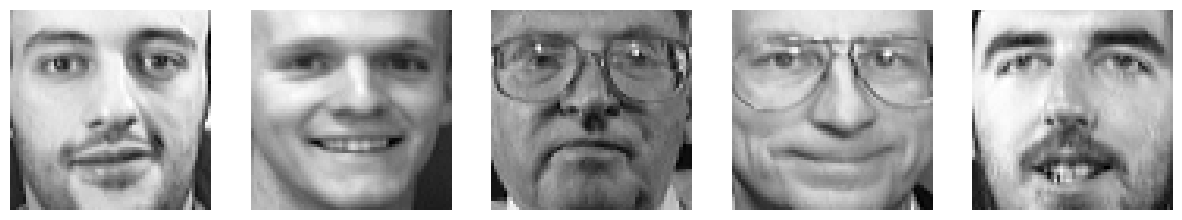

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [ ]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [ ]:
X_train.shape

(320, 32, 64, 1)

Вот один пример обучающей пары.

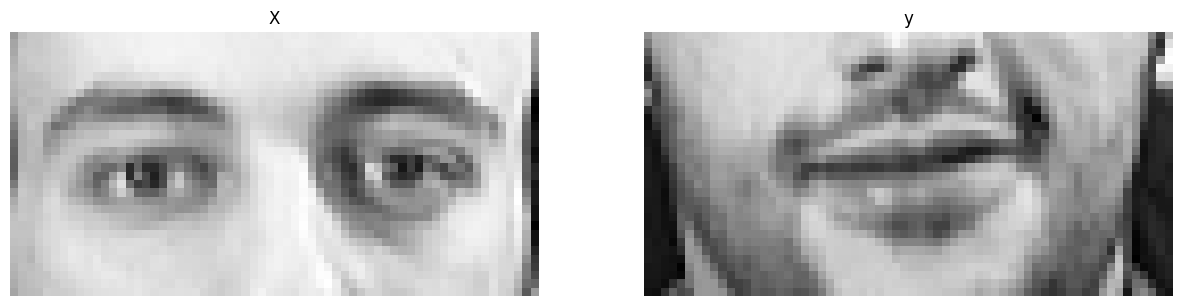

In [ ]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

In [ ]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

(320, 2048)

## 3.2. Создайте архитектуру для этой задачи

In [ ]:
model = Sequential([
    Conv2D(512,(6,6),activation = 'relu', padding='Same', input_shape = (32, 64, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(256,(6,6),activation = 'relu', padding='Same'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128,(6,6), activation = 'relu', padding='Same'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64,(6,6), activation = 'relu', padding='Same'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(32,(6,6), activation = 'relu', padding='Same'),
    Flatten(),
    Dense(4096,activation = 'relu'),
    Dense(3192,activation = 'relu'),
    Dense(2048,activation = 'linear')
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 32, 64, 512)       18944     
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 16, 32, 512)       0         
 ng2D)                                                           
                                                                 
 conv2d_40 (Conv2D)          (None, 16, 32, 256)       4718848   
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 8, 16, 256)        0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 8, 16, 128)        1179776   
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 4, 8, 128)        

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [ ]:
from keras.optimizers import Adam

In [ ]:
opt = Adam(learning_rate=0.0001, use_ema=True)

In [ ]:
model.compile(optimizer=opt,
             loss='mean_squared_error',
             metrics=['mae'])

## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath="best_model_1.h5",
                             monitor="val_mae",
                             save_best_only=True,
                             verbose=0)

In [ ]:
EPOCH = 40

his = model.fit(X_train, y_train_n, batch_size=10, epochs=EPOCH, validation_split=0.2, callbacks=[checkpoint])

model.evaluate(X_test, y_test_n)

Epoch 1/40
26/26 [==============================] - ETA: 0s - loss: 0.1331 - mae: 0.2952

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


26/26 [==============================] - 10s 202ms/step - loss: 0.1331 - mae: 0.2952 - val_loss: 0.0321 - val_mae: 0.1470
Epoch 2/40
26/26 [==============================] - 8s 327ms/step - loss: 0.0219 - mae: 0.1171 - val_loss: 0.0199 - val_mae: 0.1127
Epoch 3/40
26/26 [==============================] - 3s 123ms/step - loss: 0.0188 - mae: 0.1079 - val_loss: 0.0195 - val_mae: 0.1108
Epoch 4/40
26/26 [==============================] - 2s 61ms/step - loss: 0.0188 - mae: 0.1080 - val_loss: 0.0196 - val_mae: 0.1109
Epoch 5/40
26/26 [==============================] - 2s 59ms/step - loss: 0.0190 - mae: 0.1086 - val_loss: 0.0212 - val_mae: 0.1136
Epoch 6/40
26/26 [==============================] - 2s 61ms/step - loss: 0.0199 - mae: 0.1111 - val_loss: 0.0209 - val_mae: 0.1176
Epoch 7/40
26/26 [==============================] - 3s 130ms/step - loss: 0.0188 - mae: 0.1081 - val_loss: 0.0195 - val_mae: 0.1106
Epoch 8/40
26/26 [==============================] - 2s 62ms/step - loss: 0.0183 - mae: 0.

[0.013021978549659252, 0.08800260722637177]

## 3.5. Сделайте предсказания на тестовых данных

In [ ]:
from keras.models import load_model

model = load_model("/content/best_model_1.h5")

In [ ]:
preds = model.predict(X_test)

3/3 [==============================] - 0s 29ms/step


## 3.6. Посчитайте метрику качества на тестовых данных

In [ ]:
# Ваш код здесь

from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test_n)

0.08897205

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [ ]:
pred_test = preds.reshape(-1, 32, 64, 1)

Отрисуйте все предсказания.

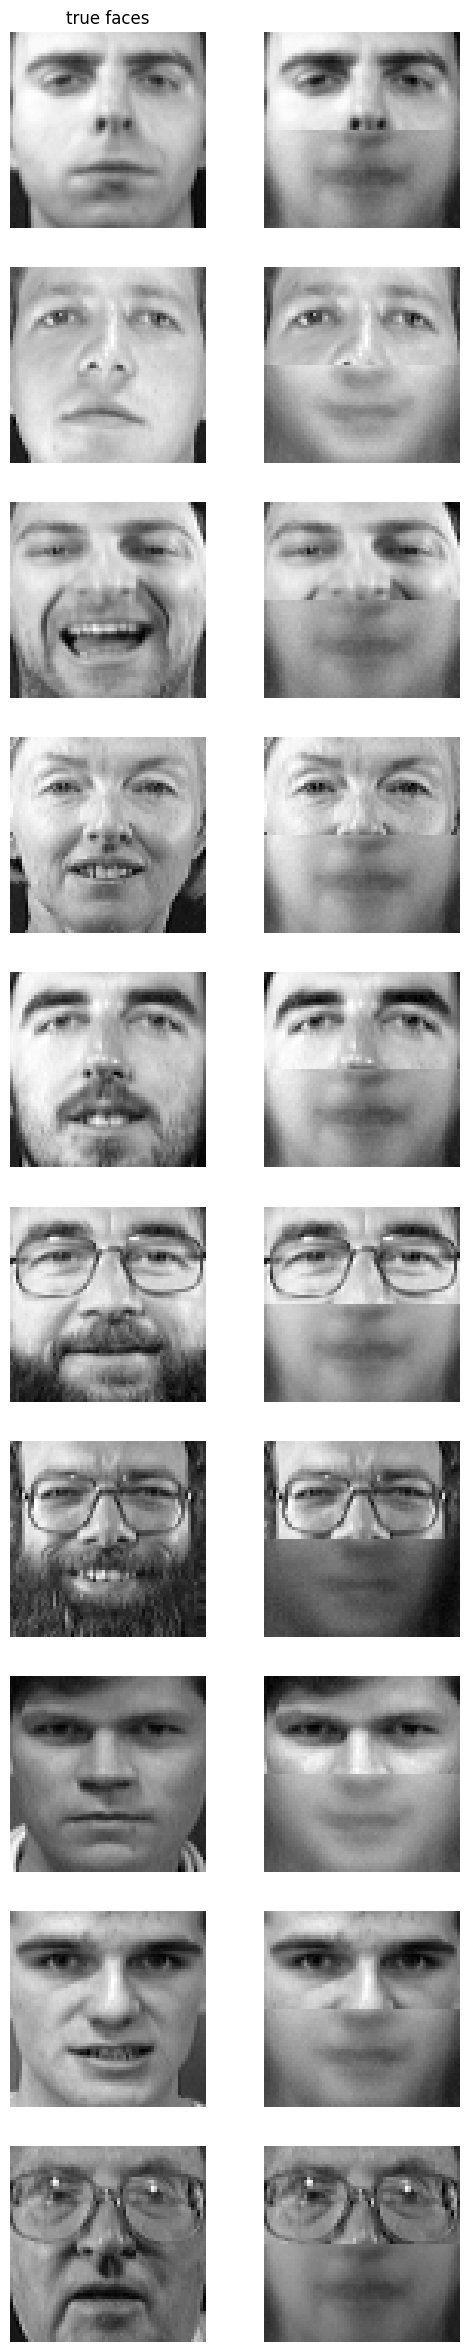

In [ ]:
# Пример кода:

n_faces = 10
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(10):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )

In [ ]:
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
from urllib.request import urlopen
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

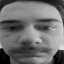

In [ ]:
req = urlopen('https://prade.s-ul.eu/t3XziqMT.png')

true_face = np.asarray(bytearray(req.read()), dtype=np.uint8)
true_face = cv2.imdecode(true_face, 0)
train_img = true_face.reshape(-1,64,64,1)

cv2_imshow(true_face)

In [ ]:
print(train_img.shape)

(1, 64, 64, 1)


In [ ]:
n_pixels = train_img.shape[1]

X_train_img = train_img[:, :(n_pixels + 1) // 2, :]
y_train_img = train_img[:, n_pixels // 2:, :]

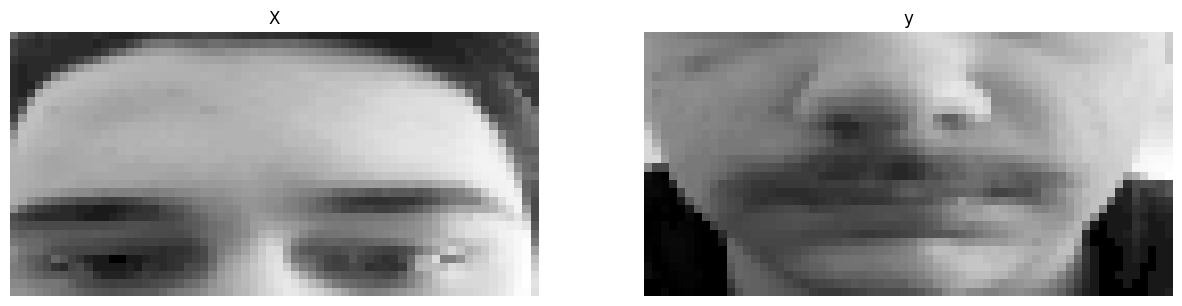

In [ ]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train_img[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train_img[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

In [ ]:
X_train_img.shape

(1, 32, 64, 1)

In [ ]:
pred_img = model.predict(X_train_img)
pred_img = pred_img.reshape(-1,32,64,1)

1/1 [==============================] - 0s 40ms/step


In [ ]:
pred_img.shape

(1, 32, 64, 1)

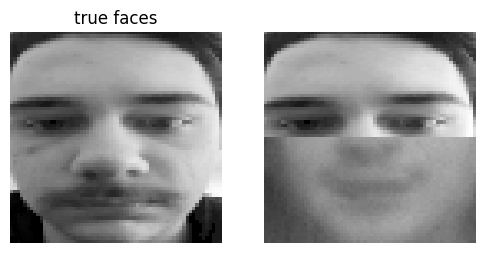

In [ ]:
n_faces = 1
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(1):
    true_face = np.vstack((X_train_img[i], y_train_img[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_train_img[i], pred_img[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )